In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = load_digits()
dataset.data.shape
dataset.data[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

In [3]:
dataset.images.shape
dataset.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [4]:
dataset.target.shape
dataset.target[100]

4

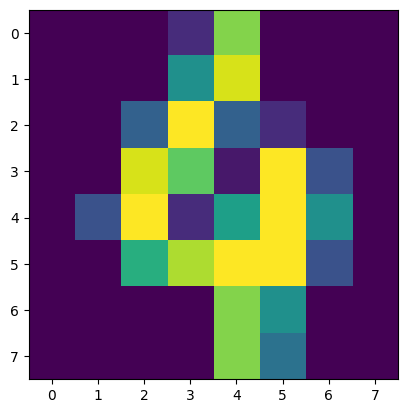

In [5]:
plt.imshow(dataset.images[100])

In [6]:
X = dataset.data
Y = dataset.target
print(Y)
print('='*20)
Y = np.eye(10)[Y]  # One hot
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

[0 1 2 ... 8 9 8]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [8]:
def sigmoid(X):
  return 1 / (1 + np.exp(-X))

def softmax(X):
  return np.exp(X) / np.sum(np.exp(X))

def root_mean_squired_error(Y_gt, Y_pred):
  return np.sqrt(np.mean((Y_gt - Y_pred) ** 2))

In [9]:
epochs = 80
lr = 0.001
D_in = X_train.shape[1]
H1 = 128
H2 = 32
D_out = Y_train.shape[1]

In [10]:
W1 = np.random.randn(D_in, H1)
W2 = np.random.randn(H1, H2)
W3 = np.random.randn(H2, D_out)

B1 = np.random.randn(1, H1)
B2 = np.random.randn(1, H2)
B3 = np.random.randn(1, D_out)

In [11]:
trainLoss = []
trainAcc = []
testAcc = []
testLoss = []

for epoch in range(epochs):
  # Train
  Y_pred_train = []
  for x, y in zip(X_train, Y_train):
    x = x.reshape(-1, 1)

    # >>>>> forward >>>>>
    # layer 1
    out1 = sigmoid(x.T @ W1 + B1)
    # layer 2
    out2 = sigmoid(out1 @ W2 + B2)
    # layer 3
    out3 = softmax(out2 @ W3 + B3)
    y_pred = out3

    Y_pred_train.append(y_pred)

    loss = root_mean_squired_error(y, Y_pred_train)

    # <<<<<< backward <<<<<<
    # layer 3
    error = -2 * (y - y_pred)
    grad_B3 = error
    grad_W3 = out2.T @ error
    # layer 2
    error = error @ W3.T * out2 * (1 - out2)
    grad_B2 = error
    grad_W2 = out1.T @ error
    # layer 1
    error = error @ W2.T * out1 * (1 - out1)
    grad_B1 = error
    grad_W1 = x @ error


    # ===== update =====
    # layer 1
    W1 -= lr * grad_W1
    B1 -= lr * grad_B1
    # layer 2
    W2 -= lr * grad_W2
    B2 -= lr * grad_B2
    # layer 3
    W3 -= lr * grad_W3
    B3 -= lr *grad_B3

  # Test
  Y_pred_test = []
  for x, y in zip(X_test, Y_test):
    x = x.reshape(-1, 1)

    # >>>>> forward >>>>>
    # layer 1
    out1 = sigmoid(x.T @ W1 + B1)
    # layer 2
    out2 = sigmoid(out1 @ W2 + B2)
    # layer 3
    out3 = softmax(out2 @ W3 + B3)
    y_pred = out3

    Y_pred_test.append(y_pred)

    loss = root_mean_squired_error(y, Y_pred_test)

  print('='*25, 'Epoch:', epoch, '='*25)
  Y_pred_train = np.array(Y_pred_train).reshape(-1, 10)
  loss_train = root_mean_squired_error(Y_train, Y_pred_train)
  accuracy_train = np.sum(np.argmax(Y_train, axis=1) == np.argmax(Y_pred_train, axis=1)) / len(Y_train)
  print("❌Loss Train❌ :", loss_train, "✅Accuracy Train✅:", accuracy_train)
  trainLoss.append(loss_train)
  trainAcc.append(accuracy_train)

  Y_pred_test = np.array(Y_pred_test).reshape(-1, 10)
  loss_test = root_mean_squired_error(Y_test, Y_pred_test)
  accuracy_test = np.sum(np.argmax(Y_test, axis=1) == np.argmax(Y_pred_test, axis=1)) / len(Y_test)
  print("❌Loss Test❌  :", loss_test,  "✅Accuracy Test✅  :", accuracy_test)
  testLoss.append(loss_test)
  testAcc.append(accuracy_test)

========================= Epoch: 0 =========================
❌Loss Train❌ : 0.3339422055990929 ✅Accuracy Train✅: 0.11969380654140571
❌Loss Test❌  : 0.31058734520314807 ✅Accuracy Test✅  : 0.15555555555555556
========================= Epoch: 1 =========================
❌Loss Train❌ : 0.29612267503618206 ✅Accuracy Train✅: 0.24147529575504523
❌Loss Test❌  : 0.2938352604485902 ✅Accuracy Test✅  : 0.25277777777777777
========================= Epoch: 2 =========================
❌Loss Train❌ : 0.2814659648984128 ✅Accuracy Train✅: 0.3298538622129436
❌Loss Test❌  : 0.2811732422504608 ✅Accuracy Test✅  : 0.35
========================= Epoch: 3 =========================
❌Loss Train❌ : 0.2685274995048367 ✅Accuracy Train✅: 0.4342379958246347
❌Loss Test❌  : 0.27152860334859247 ✅Accuracy Test✅  : 0.42777777777777776
========================= Epoch: 4 =========================
❌Loss Train❌ : 0.257907246288302 ✅Accuracy Train✅: 0.5024356297842728
❌Loss Test❌  : 0.2633086537932666 ✅Accuracy Test✅  : 0.4805

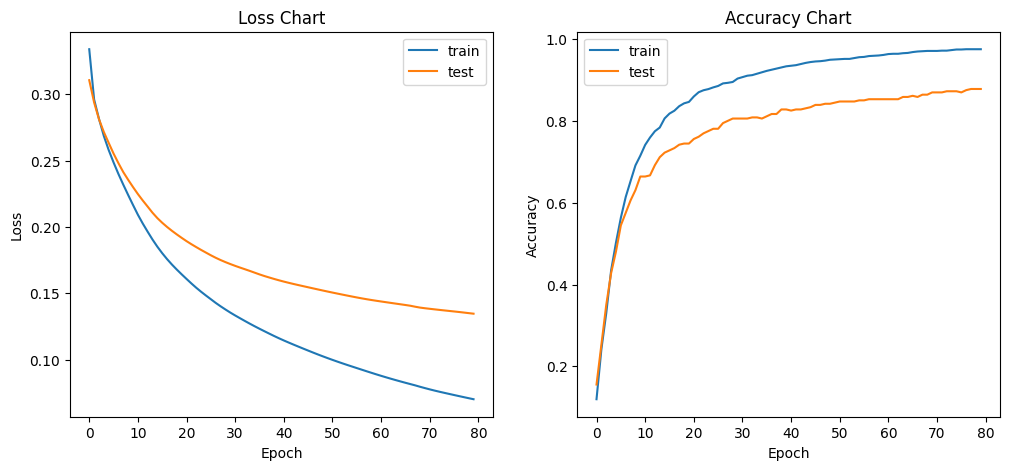

In [12]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))
ax1.plot(trainLoss)
ax1.plot(testLoss)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(["train" , "test"])
ax1.title.set_text('Loss Chart')

ax2.plot(trainAcc)
ax2.plot(testAcc)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["train" , "test"])
ax2.title.set_text('Accuracy Chart')
plt.show()

In [16]:
import cv2

In [19]:
image = cv2.imread('Input\pic4.jpg')
image.shape

(8, 8, 3)

In [20]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image.shape

(8, 8)

In [21]:
image = image.reshape(64, 1)
image.shape

(64, 1)

In [22]:
x = image

# >>>>> forward >>>>>
# layer 1
out1 = sigmoid(x.T @ W1 + B1)
# layer 2
out2 = sigmoid(out1 @ W2 + B2)
# layer 3
out3 = softmax(out2 @ W3 + B3)

y_pred = out3

print(np.argmax(y_pred))

8


C:\Users\Royal Center\AppData\Local\Temp\ipykernel_14180\1103958328.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
